#Imports

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import copy

#Loading, cleaning and exploring the data

In [127]:
path = f'/content/drive/MyDrive/Colab Notebooks/Project/data/'

In [128]:
relpath = f'/data0/Data'

In [129]:
pathr= path+relpath

In [130]:
os.listdir(pathr)

['coin_XRP.csv',
 'coin_WrappedBitcoin.csv',
 'coin_USDCoin.csv',
 'coin_Uniswap.csv',
 'coin_Tron.csv',
 'coin_Stellar.csv',
 'coin_Tether.csv',
 'coin_Solana.csv',
 'coin_Polkadot.csv',
 'coin_NEM.csv',
 'coin_Monero.csv',
 'coin_Litecoin.csv',
 'coin_Iota.csv',
 'coin_Ethereum.csv',
 'coin_EOS.csv',
 'coin_Cosmos.csv',
 'coin_Dogecoin.csv',
 'coin_ChainLink.csv',
 'coin_Bitcoin.csv',
 'coin_CryptocomCoin.csv',
 'coin_Cardano.csv',
 'coin_BinanceCoin.csv',
 'coin_Aave.csv']

In [131]:
df = pd.DataFrame()
for file in os.listdir(pathr):
    if file.endswith(".csv"):
        df = pd.concat([df , pd.read_csv(os.path.join(pathr, file),infer_datetime_format=True)], axis=0 )

print(len(df))

df.reset_index(drop=True, inplace=True)
df.drop('SNo',axis=1 ,inplace=True)
df

37082


,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07
1,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07
2,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07
3,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07
4,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07
...,...,...,...,...,...,...,...,...,...
37077,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
37078,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
37079,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
37080,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09


In [132]:
df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07
1,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07
2,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07
3,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07
4,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07
...,...,...,...,...,...,...,...,...,...
37077,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
37078,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
37079,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
37080,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09


In [133]:
df['Symbol'].nunique()

23

In [134]:
df['Date'] = pd.to_datetime(df['Date'])

In [135]:
df.columns

Index(['Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       37082 non-null  object        
 1   Symbol     37082 non-null  object        
 2   Date       37082 non-null  datetime64[ns]
 3   High       37082 non-null  float64       
 4   Low        37082 non-null  float64       
 5   Open       37082 non-null  float64       
 6   Close      37082 non-null  float64       
 7   Volume     37082 non-null  float64       
 8   Marketcap  37082 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.5+ MB


In [137]:
with open(path+f'df.csv', 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

#Top five cryptocurrencies by the Market Cap

In [138]:
df.groupby(['Symbol'])['Marketcap'].last()

Symbol
AAVE     4.066776e+09
ADA      4.530158e+10
ATOM     2.865093e+09
BNB      4.924196e+10
BTC      6.418992e+11
CRO      3.103718e+09
DOGE     3.055252e+10
DOT      1.546772e+10
EOS      3.707457e+09
ETH      2.710286e+11
LINK     8.775356e+09
LTC      9.277627e+09
MIOTA    2.367423e+09
SOL      9.343050e+09
TRX      4.653234e+09
UNI      1.315501e+10
USDC     2.567322e+10
USDT     6.233384e+10
WBTC     6.713947e+09
XEM      1.202315e+09
XLM      6.049985e+09
XMR      3.986738e+09
XRP      3.072284e+10
Name: Marketcap, dtype: float64

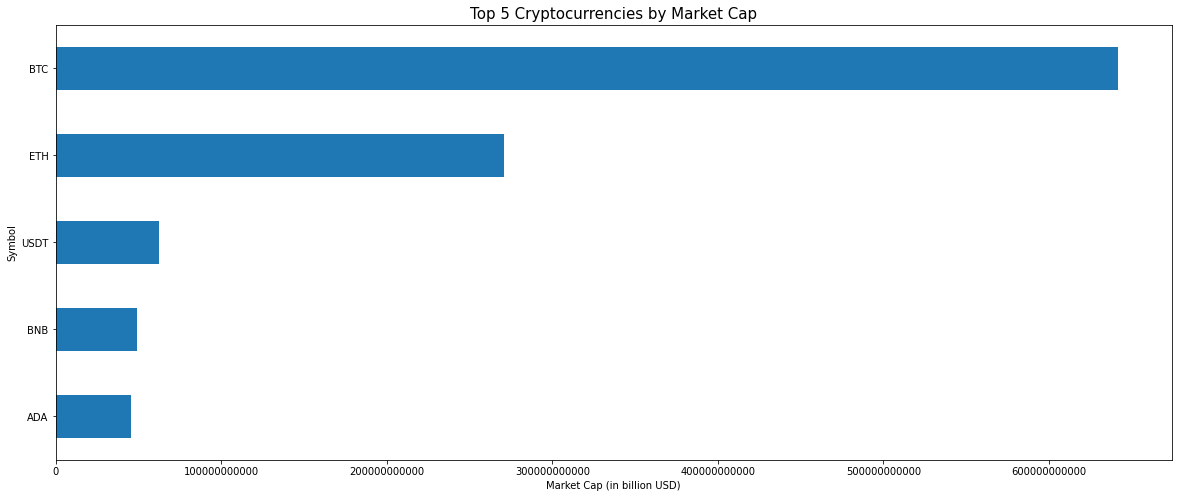

In [139]:
plt.figure(figsize= (20,8))
ax = df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

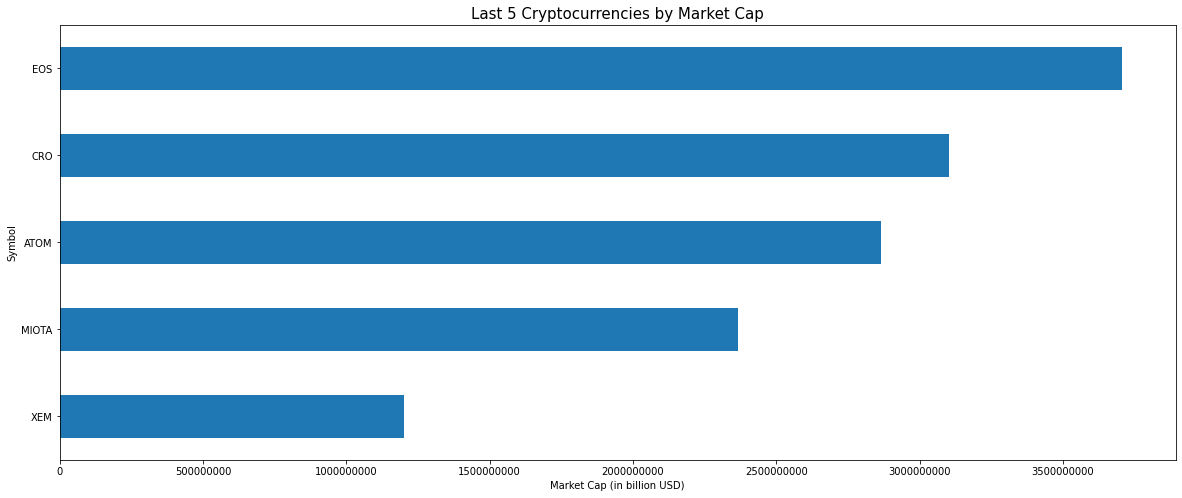

In [140]:
plt.figure(figsize= (20,8))
ax = df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=True).head(5).plot(kind='barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Last 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

<h3>From here we can see that Bitcoin is the highest value according to market cap and etherum is 50% of it. and all other are very less in comparison to it and USDT is 3 times less then the Etherum.</h3>

#Plotting Graphs of Closing Prices of Top 5 and Bottom 5 Cryptocurrencies as per Market Cap

In [141]:
dx=df.copy(deep = True)

In [142]:
top5 = list(dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).index)

In [143]:
bottom5 = list(dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=True).head(5).index)

In [144]:
top_5_currency_names = dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).index
top_5_currency_names_except_first=dx[dx['Symbol']!='BTC'].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).index
top_5_currency_names_except_first_two=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).index
top_5_currency_names_except_first_two_three=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')& (dx['Symbol']!='USDT')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).index
top_5_currency_names_except_first_two_three_four=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')& (dx['Symbol']!='USDT')& (dx['Symbol']!='BNB')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).index

data_top_5_currencies = dx[dx['Symbol'].isin(top_5_currency_names)]
top_5_currencies_after_BTC = dx[dx['Symbol'].isin(top_5_currency_names_except_first)]
top_5_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(top_5_currency_names_except_first_two)]
top_5_currencies_after_BTC_ETH_USDT = dx[dx['Symbol'].isin(top_5_currency_names_except_first_two_three)]
top_5_currencies_after_BTC_ETH_USDT_BNB = dx[dx['Symbol'].isin(top_5_currency_names_except_first_two_three_four)]

In [145]:
l_5_currency_names = dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=True).head(5).index
l_5_currency_names_except_first=dx[dx['Symbol']!='XEM'].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=True).head(5).index
l_5_currency_names_except_first_two=dx[(dx['Symbol']!='XEM') & (dx['Symbol']!='MIOTA')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=True).head(5).index
l_5_currency_names_except_first_two_three=dx[(dx['Symbol']!='XEM') & (dx['Symbol']!='MIOTA')& (dx['Symbol']!='ATOM')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=True).head(5).index
l_5_currency_names_except_first_two_three_four=dx[(dx['Symbol']!='XEM') & (dx['Symbol']!='MIOTA')& (dx['Symbol']!='ATOM')& (dx['Symbol']!='CRO')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=True).head(5).index

data_l_5_currencies = dx[dx['Symbol'].isin(l_5_currency_names)]
l_5_currencies_after_BTC = dx[dx['Symbol'].isin(l_5_currency_names_except_first)]
l_5_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(l_5_currency_names_except_first_two)]
l_5_currencies_after_BTC_ETH_USDT = dx[dx['Symbol'].isin(l_5_currency_names_except_first_two_three)]
l_5_currencies_after_BTC_ETH_USDT_BNB = dx[dx['Symbol'].isin(l_5_currency_names_except_first_two_three_four)]

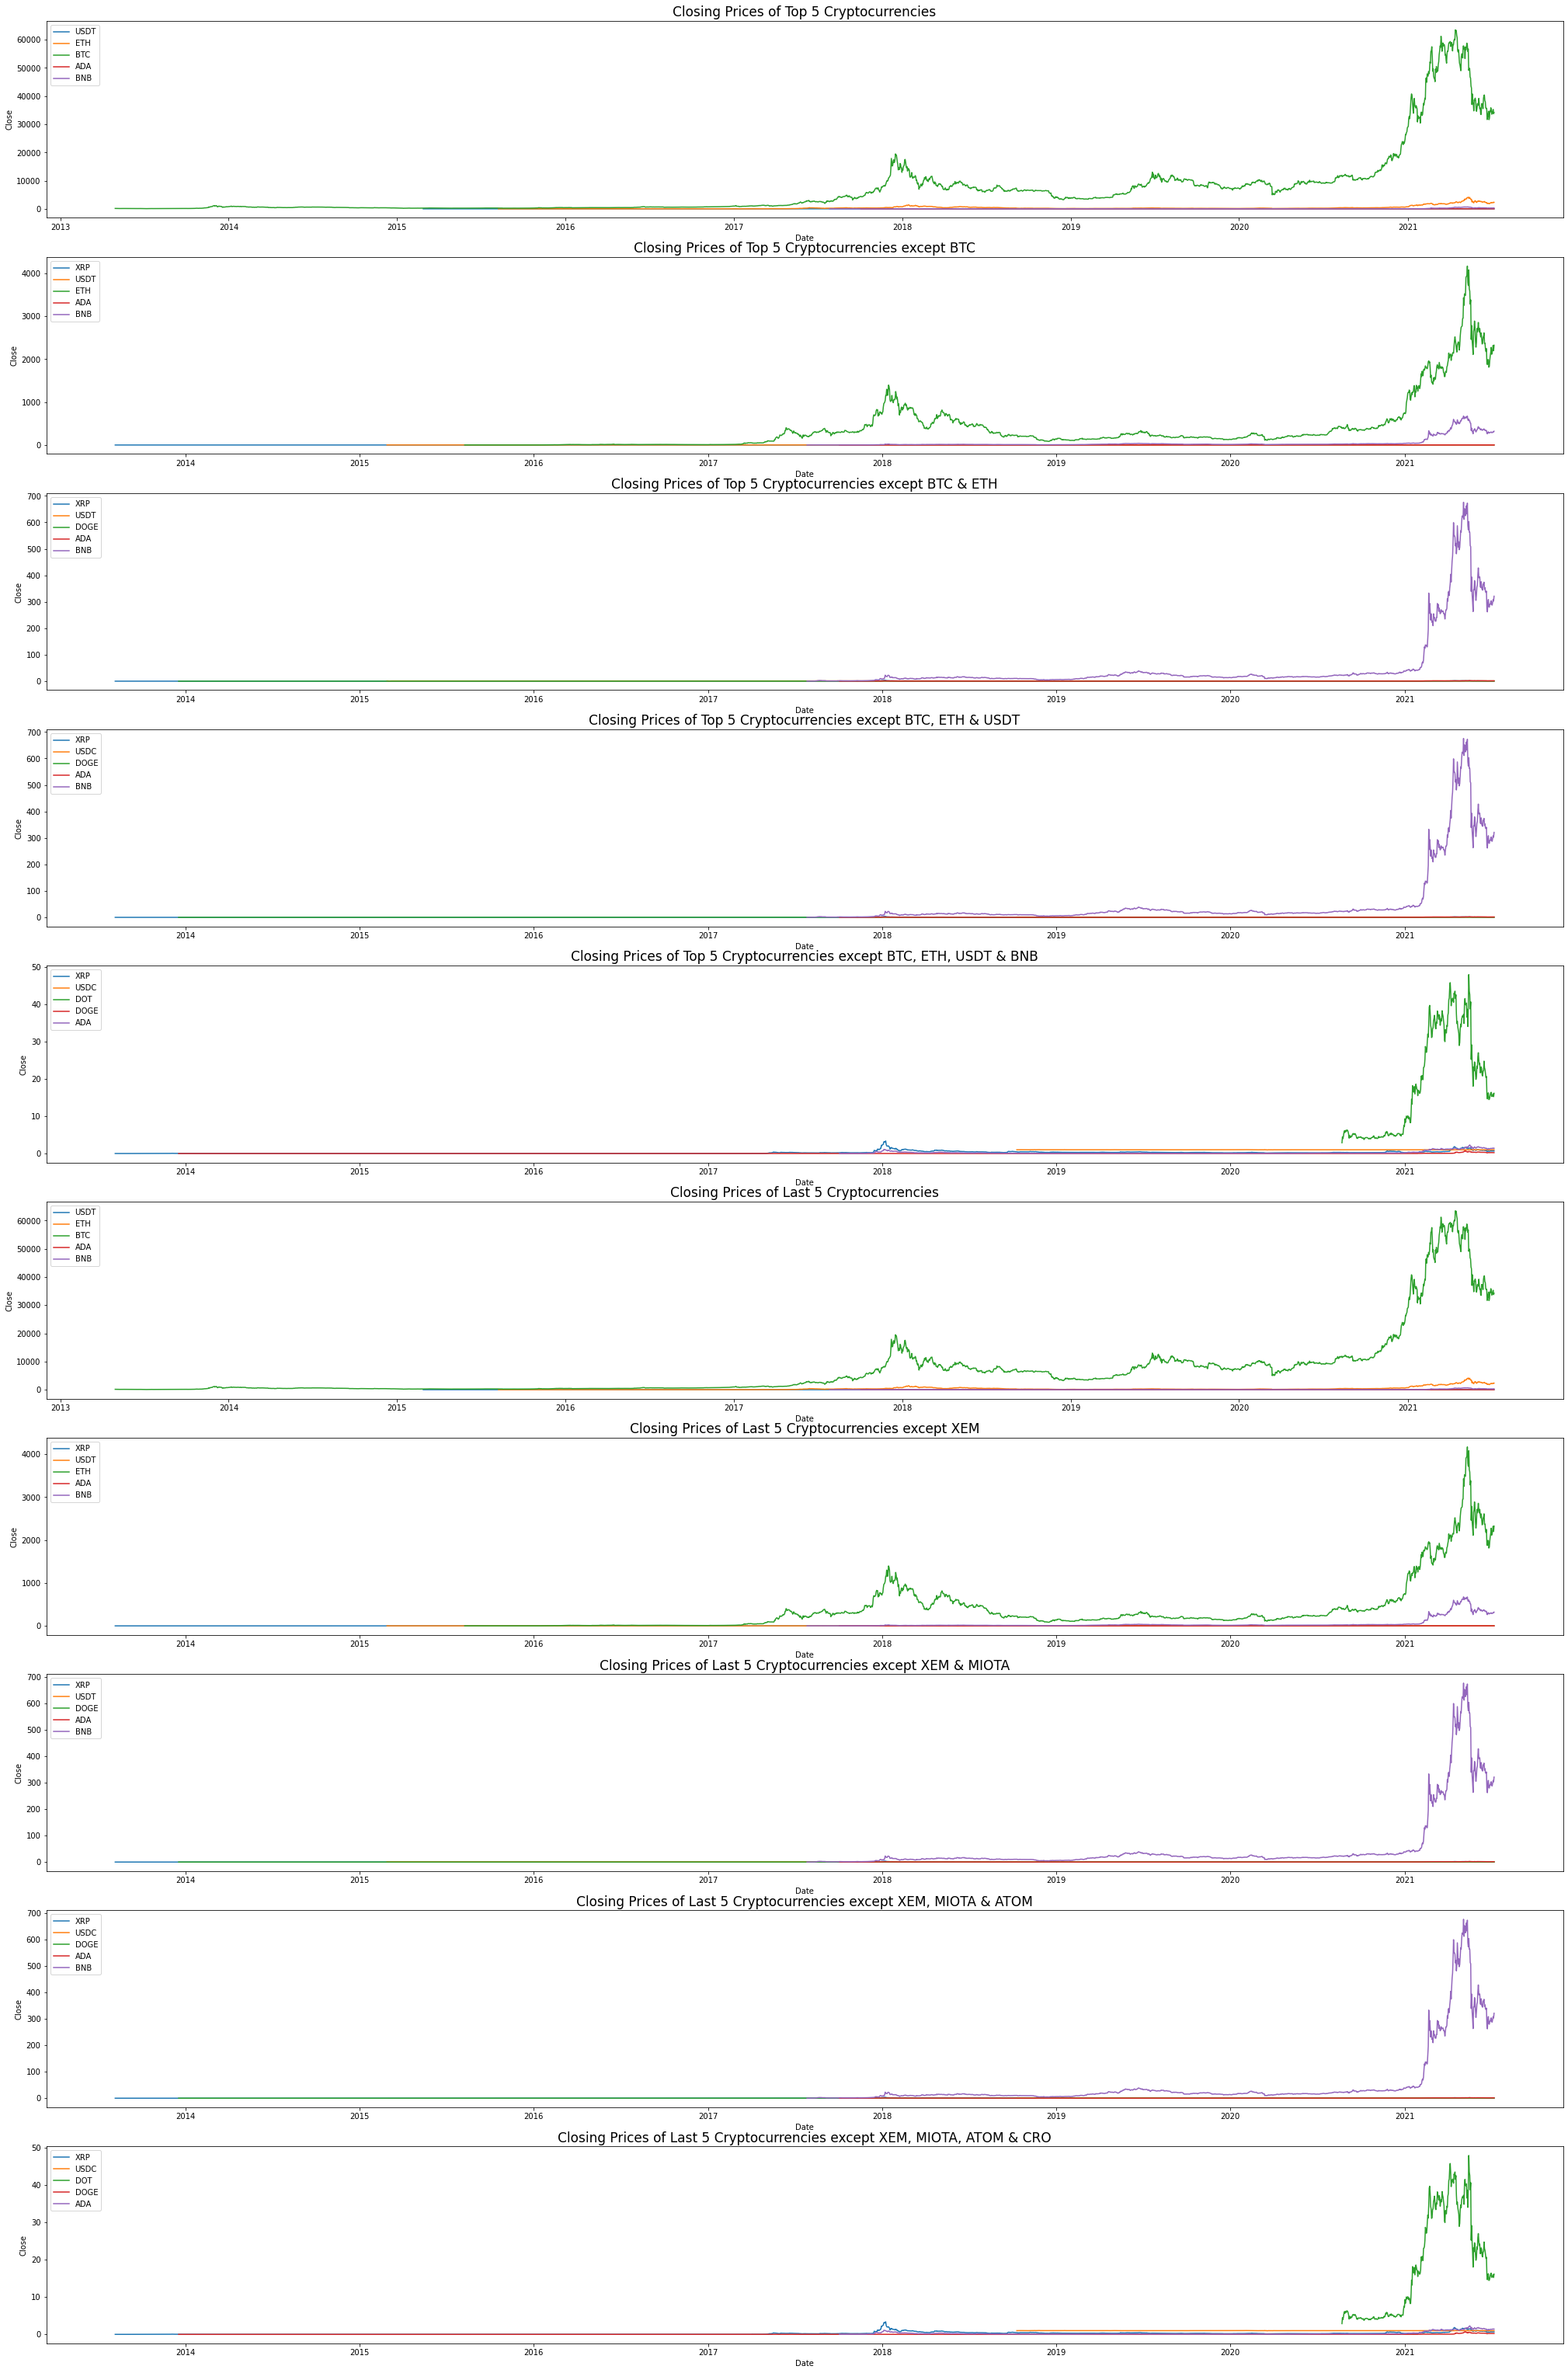

In [146]:
plt.figure(figsize=(35,55))

plt.subplot(10,1,1)
sns.lineplot(data=data_top_5_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 5 Cryptocurrencies", fontsize=17)
plt.legend(loc='upper left')

plt.subplot(10,1,2)
sns.lineplot(data=top_5_currencies_after_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 5 Cryptocurrencies except BTC", fontsize=17)
plt.legend(loc='upper left')

plt.subplot(10,1,3)
sns.lineplot(data=top_5_currencies_after_BTC_ETH,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 5 Cryptocurrencies except BTC & ETH", fontsize=17)
plt.legend(loc='upper left')

plt.subplot(10,1,4)
sns.lineplot(data=top_5_currencies_after_BTC_ETH_USDT,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 5 Cryptocurrencies except BTC, ETH & USDT", fontsize=17)
plt.legend(loc='upper left')

plt.subplot(10,1,5)
sns.lineplot(data=top_5_currencies_after_BTC_ETH_USDT_BNB,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 5 Cryptocurrencies except BTC, ETH, USDT & BNB", fontsize=17)
plt.legend(loc='upper left')

plt.subplot(10,1,6)
sns.lineplot(data=data_top_5_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Last 5 Cryptocurrencies", fontsize=17)
plt.legend(loc='upper left')

plt.subplot(10,1,7)
sns.lineplot(data=top_5_currencies_after_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Last 5 Cryptocurrencies except XEM", fontsize=17)
plt.legend(loc='upper left')

plt.subplot(10,1,8)
sns.lineplot(data=top_5_currencies_after_BTC_ETH,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Last 5 Cryptocurrencies except XEM & MIOTA", fontsize=17)
plt.legend(loc='upper left')

plt.subplot(10,1,9)
sns.lineplot(data=top_5_currencies_after_BTC_ETH_USDT,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Last 5 Cryptocurrencies except XEM, MIOTA & ATOM", fontsize=17)
plt.legend(loc='upper left')


plt.subplot(10,1,10)
sns.lineplot(data=top_5_currencies_after_BTC_ETH_USDT_BNB,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Last 5 Cryptocurrencies except XEM, MIOTA, ATOM & CRO", fontsize=17)
plt.legend(loc='upper left')

plt.show()

<h3>In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH. <br><br>Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.</h3>

#Candlestick charts

In [147]:
for i in top5+bottom5:
    options=[i]
    rslt_df = df[df['Symbol'].isin(options)]
    layout = dict(
            title=f"{i} Candlestick Chart",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Time")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price US Dollars"))
    )
    data=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data,layout=layout)

    figSignal.show()

#Moving Averages v/s Closing Price

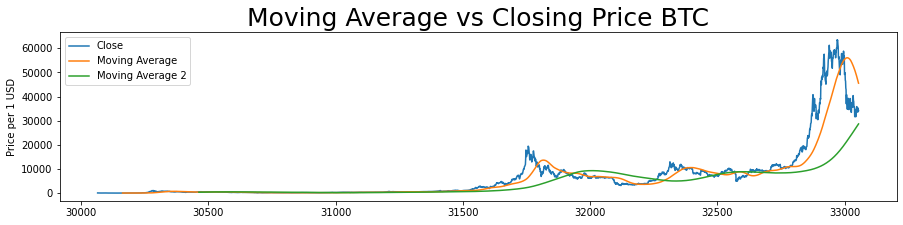

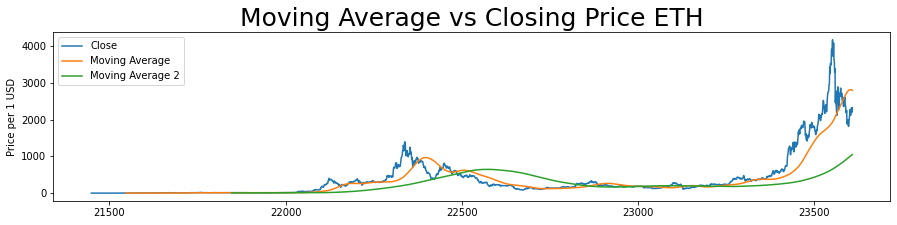

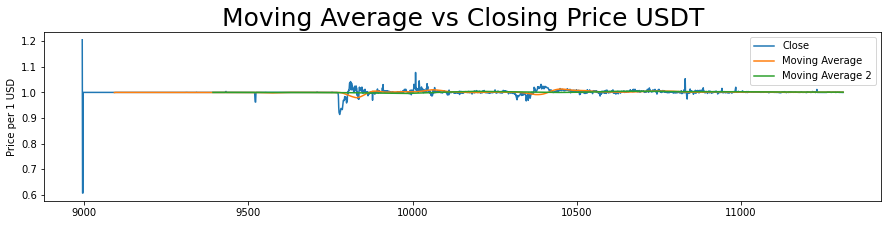

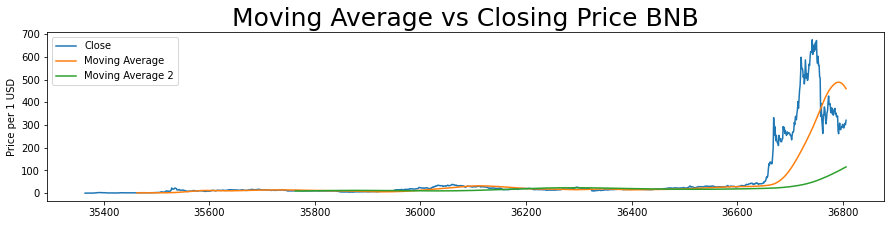

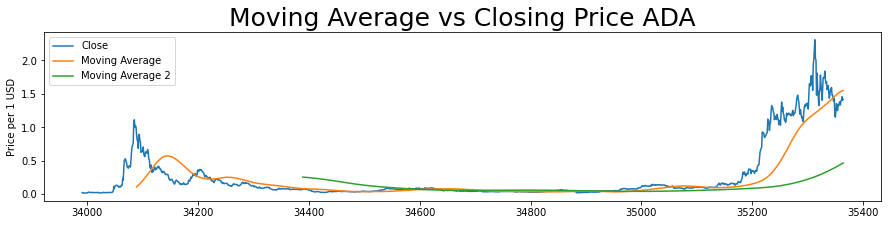

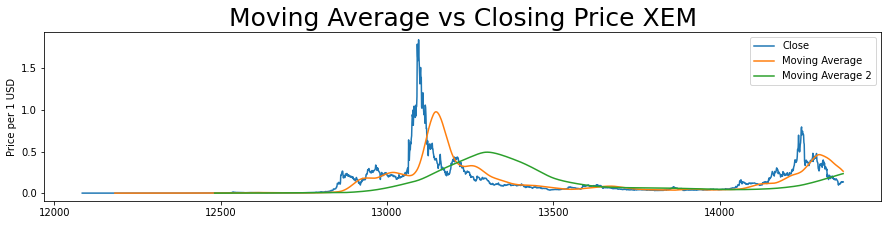

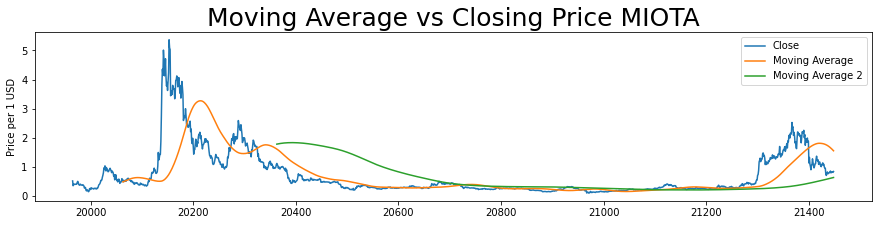

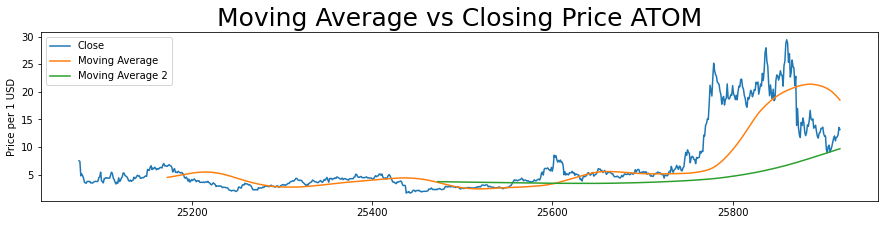

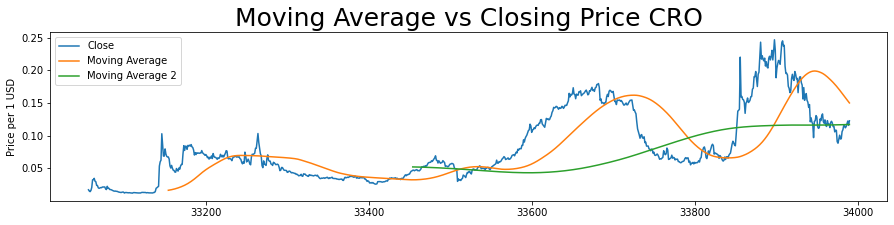

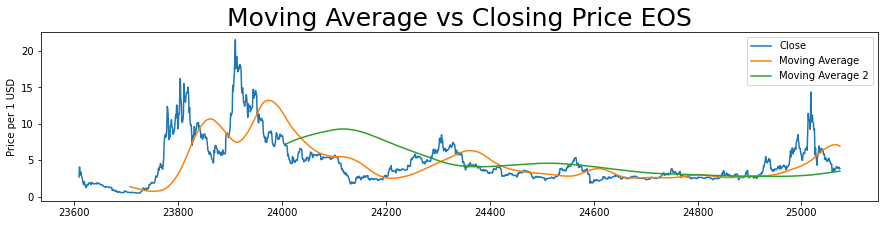

In [148]:
for i in top5+bottom5:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1
    plt.show()

#Conclusion